<a href="https://colab.research.google.com/github/ykpdev/DeepLearning/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cihaz: cpu


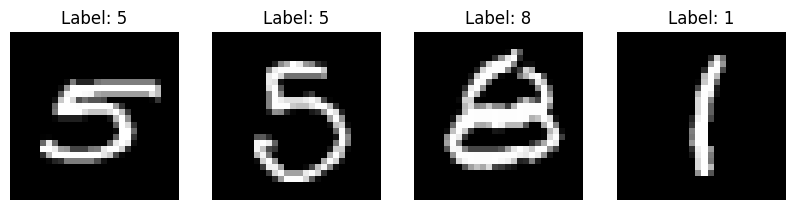

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Cihaz: {device}")
else:
    device = torch.device("cpu")
    print(f"Cihaz: {device}")
def get_data_loaders(batch_size=64):

    transform=transforms.Compose([transforms.ToTensor(),
                       transforms.Normalize((0.5,),(0.5,))
                       ])
    train_set=torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transform)
    test_set=torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)
    return train_loader,test_loader
train_loader,test_loader = get_data_loaders()

# data visualization
def visualize_samples(loader, n):
    images, labels = next(iter(loader))  # ilk batch'ten görüntü ve etiketleri alalım
    fig, axes = plt.subplots(1, n, figsize=(10, 5)) # n farklı görüntü için görselleştirme alanı

    for i in range(n):
        axes[i].imshow(images[i].squeeze(), cmap="gray") # görseli gri tonlamalı olarak göster
        axes[i].set_title(f"Label: {labels[i].item()}") # görüntüye ait sınıf etiketini başlık olarak yaz
        axes[i].axis("off") # eksenleri gizle

    plt.show()
visualize_samples(train_loader,4)
# 2. Model Sınıfının Tanımlanması (NeuralNetwork Class)
class NeuralNetwork(nn.Module):
    def __init__(self):
        # Üst sınıfı başlat (PyTorch özelliklerini kazan)
        super(NeuralNetwork, self).__init__()

        # Katmanların Tanımlanması
        self.flatten = nn.Flatten()               # Görüntüyü 1D vektöre düzleştirir (28*28 = 784)
        self.fc1     = nn.Linear(784, 128)        # İlk gizli katman: 784 giriş -> 128 çıkış
        self.fc2     = nn.Linear(128, 64)         # İkinci gizli katman: 128 giriş -> 64 çıkış
        self.fc3     = nn.Linear(64, 10)          # Çıkış katmanı: 64 giriş -> 10 çıkış (Sınıf sayısı)

    def forward(self, x):
        # Veri Akışı
        x = self.flatten(x)

        # 1. Katman + ReLU Aktivasyonu
        x = self.fc1(x)
        x = F.relu(x)

        # 2. Katman + ReLU Aktivasyonu
        x = self.fc2(x)
        x = F.relu(x)

        # Çıkış Katmanı (Logits)
        logits = self.fc3(x)

        return logits

# 3. Modeli Oluşturma ve Cihaza Taşıma
model = NeuralNetwork().to(device)
#print("\n--- Model Yapısı ---")
#print(model)
# Önceki kodundaki lambda fonksiyonu
# ... (NeuralNetwork class tanımı burada)

# 1. Modeli Oluşturma ve Cihaza Taşıma
model = NeuralNetwork().to(device)

# 2. Kayıp fonksiyonu ve optimizasyon algoritmasini belirle
define_loss_and_optimizer = lambda model: (
    nn.CrossEntropyLoss(),                          # multi class classification problems loss function
    optim.Adam(model.parameters(), lr=0.001)        # update weights with adam
)

# 3. Tanımlanan lambda fonksiyonunu çağırarak değerleri atama (Eklenen kodunuz!)
criterion, optimizer = define_loss_and_optimizer(model)

# Şimdi model, criterion ve optimizer hazır, train_model fonksiyonunu çağırabilirsin.
# train_model(model, train_loader, criterion, optimizer, epochs=10)
# 4. Kayıp Fonksiyonu (Loss Function) ve Eniyileyici (Optimizer)
# (Lambda fonksiyonu yerine daha sade bir tanımlama kullanıyorum)
#loss_fn = nn.CrossEntropyLoss()

# model.parameters(): Öğrenilebilir tüm ağırlık ve önyargıları Adam'a verir
# lr=0.001: Öğrenme Oranı
#optimizer = optim.Adam(model.parameters(), lr=0.001)


def train_model(model, train_loader, criterion, optimizer, epochs = 10):

    # Modeli eğitim moduna al
    model.train()

    train_losses = [] # her bir epoch sonunda elde edilen loss degerlerini saklamak icin bir liste

    # Belirtilen epoch sayısı kadar eğitim yap
    for epoch in range(epochs):
        total_loss = 0 # toplam kayip degeri

        # Tüm eğitim verileri üzerinde iterasyon gerçekleştir (Batch Döngüsü)
        for images, labels in train_loader:

            # Verileri cihaza taşı (GPU/CPU)
            images, labels = images.to(device), labels.to(device)

            # 1. Gradyanları sıfırla
            optimizer.zero_grad()

            # 2. Modeli uygula, ileri yayılım (forward propagation)
            predictions = model(images)

            # 3. Loss hesaplama -> y_prediction ile y_real
            loss = criterion(predictions, labels)

            # 4. Geri yayılım (gradyan hesaplama)
            loss.backward()

            # 5. Ağırlıkları güncelle (update weights)
            optimizer.step()

            # Kayıp değerini topla (item() ile Python sayısına çevir)
            total_loss += loss.item()

        # Epoch sonu istatistikleri
        avg_loss = total_loss / len(train_loader) # ortalama kayip hesaplama
        train_losses.append(avg_loss)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.3f}")

    # ===============================================
    # LOSS GRAFİĞİ
    # ===============================================
    plt.figure()
    plt.plot(range(1, epochs + 1), train_losses, marker = "o", linestyle = "-", label = "Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    plt.show()
    return model
    trained_model = train_model(model, train_loader, criterion, optimizer, epochs=5)
    print("\nEğitim tamamlandı.")